In [1]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import xgboost as xgb
import folium

In [2]:
# read the dataset using pandas
df = pd.read_csv("data_x.csv")
df

,id,Tract_number,zip_code,Year,state,Unweighted Sample Count of the population,Avg household size of occupied housing units,Total population in occupied housing units,Median Estimated Home Value(owner occupied units),Total Population,...,Renter households,Housing units with mortgage,Total housing Units,Number of Sales and office workers,Number of people in management business science and arts,Number of service workers,Number of educational and health service workers,Number of artsentertainment and food service workers,Number of finance and real estate workers,Number of tech workers
0,1,1001020100,36067.0,2012,Alabama,195.0,2,1764,121500.0,1812,...,203,357,724,289,242,98,105,55,27,0
1,2,1001020200,36067.0,2012,Alabama,222.0,2,2074,130500.0,2218,...,722,311,893,180,367,144,220,79,49,0
2,3,1001020300,36067.0,2012,Alabama,261.0,2,3103,118700.0,3155,...,643,551,1361,334,450,310,217,183,51,29
3,4,1001020400,36067.0,2012,Alabama,764.0,2,4329,133500.0,4337,...,915,848,1851,547,596,250,325,192,159,38
4,5,1001020500,36066.0,2012,Alabama,540.0,2,10431,174500.0,10498,...,3499,1815,4114,1409,2304,859,1036,499,323,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511387,438332,56029965500,82414.0,2017,Wyoming,349.0,2,4559,222100.0,4642,...,1258,831,2090,710,757,801,507,517,123,14
511388,438333,56029965400,82414.0,2017,Wyoming,320.0,2,5844,228100.0,5910,...,1772,936,2867,730,913,547,661,452,80,16
511389,438334,56029965300,82450.0,2017,Wyoming,569.0,2,7046,314900.0,7214,...,1561,1122,4200,620,1406,452,886,314,64,38
511390,438335,56035000102,82941.0,2017,Wyoming,227.0,2,6260,282400.0,6284,...,1522,1016,3737,447,1584,536,552,209,133,5


In [3]:
# get a general overview of the dataset
df.describe()

,id,Tract_number,zip_code,Year,Unweighted Sample Count of the population,Avg household size of occupied housing units,Total population in occupied housing units,Median Estimated Home Value(owner occupied units),Total Population,Median Gross rent as % of household inc,...,Renter households,Housing units with mortgage,Total housing Units,Number of Sales and office workers,Number of people in management business science and arts,Number of service workers,Number of educational and health service workers,Number of artsentertainment and food service workers,Number of finance and real estate workers,Number of tech workers
count,511392.000000,5.113920e+05,508357.000000,511392.000000,510464.000000,511392.000000,511392.000000,5.110470e+05,511392.000000,511392.000000,...,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000,511392.000000
mean,245259.928571,2.782602e+10,50689.436068,2014.857143,355.655135,2.129124,4214.901758,2.252238e+05,4325.183785,30.206405,...,1413.807561,669.422537,1827.629609,473.524826,721.872456,352.438462,448.481026,186.095887,130.312785,41.973993
std,133687.409974,1.581001e+10,29262.662964,1.807018,187.964759,0.591227,2122.779132,1.970134e+05,2130.207678,9.164117,...,1135.065639,473.430636,866.268775,286.956461,570.382097,221.873957,280.688857,149.297336,124.953420,51.307240
min,1.000000,1.001020e+09,1001.000000,2012.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,127848.750000,1.212708e+10,27530.000000,2013.000000,254.000000,2.000000,2798.000000,1.030000e+05,2891.000000,25.000000,...,607.000000,339.000000,1256.000000,274.000000,327.000000,200.000000,257.000000,89.000000,49.000000,10.000000
50%,255696.500000,2.712304e+10,48104.000000,2015.000000,321.000000,2.000000,3959.000000,1.644000e+05,4062.000000,29.000000,...,1124.000000,591.000000,1722.000000,426.000000,580.000000,311.000000,399.000000,152.000000,97.000000,27.000000
75%,374412.250000,4.103597e+10,77428.000000,2017.000000,406.000000,2.000000,5318.000000,2.810000e+05,5436.000000,35.000000,...,1915.000000,905.000000,2283.000000,617.000000,973.000000,456.000000,582.000000,242.000000,175.000000,57.000000
max,438336.000000,5.604595e+10,99928.000000,2017.000000,6289.000000,14.000000,65345.000000,2.000001e+06,65528.000000,50.000000,...,22309.000000,12672.000000,26526.000000,6131.000000,18936.000000,4007.000000,9073.000000,5123.000000,2947.000000,1142.000000


### Initial thoughts (Defining the problem)
<br>
<div style="text-align: justify">
The main aim in this problem is to get the zip codes where "property" investing could be profitable. The data that we have in this case is census data. In this problem, I am assuming that investing in <b>"property"</b> is equivalent to investing in "Homes". Hence, the main assumption is that the whoever is going to use the system is going to be investing in purchasing houses and selling them later to earn a profit, as part of property investment. The column in the data that gives information about house prices is the <b>"Median Estimated Home Value(owner occupied units)"</b>. The intuition/motivation is that one should invest in a home whose value will increase in the future, so that it could be sold for a profit in the future. Hence, the <b>"Median Estimated Home Value(owner occupied units)"</b> could be the dependent variable that could be modelled using the rest of the features in the dataset. Now that this has been determined, the problem is a bit more streamlined.
    
<br>
<br>
Next, I would ask the question, once a model is trained, how would one predict future house prices in order to make a decision as to which zipcode one should invest in? The answer to this question lies in a second question - what data would be available in order to input to the model so that it could make a prediction for the future house prices? If one were to predict house prices for the year 2016 in a real-life scenario using a model, it would not be possible that census data would be available at the start of the year itself for the year 2016. You're basically in the year 2016, but there is nocensus data available yet - and it may not be available till the end of the year. All you have is data uptil the year 2015. Hence, it would make sense to perform <b>"shifting"</b> here, since this is a time series problem under the hood. Based on these thoughts, it makes more sense to use the features/data from the previous year, to make a prediction for the estimated Home value for the current year. This would ensure that if I want to decide which zipcodes I should invest in, in the year 2016, I could use census data available from the year 2015. This approach, however, assumes that the data from the previous year would have a correlation with the house prices for the current year, assuming that these features would not change much over a year.
    
Next, this shifting process described above (using the census data from the previous year to predict the <b>"Median Estimated Home Value(owner occupied units))"</b> will require some data manipulation. Also, on observing the data closely, it was observed that every row does not have a unique identifier, so a unique identifier needs to be created. 
</div>

### Data Manipulation/Cleaning/Processing/Preparation

In [4]:
# the 'id' column can be dropped since it does not give any useful information
df.drop('id', axis=1, inplace=True)

Since we are working with zipcodes here, and since it is an important part of our problem, the rows which do not have zipcodes should be dropped

In [5]:
# display the rows with null values for the zip_code
df.loc[df["zip_code"].isnull()]

,Tract_number,zip_code,Year,state,Unweighted Sample Count of the population,Avg household size of occupied housing units,Total population in occupied housing units,Median Estimated Home Value(owner occupied units),Total Population,Median Gross rent as % of household inc,...,Renter households,Housing units with mortgage,Total housing Units,Number of Sales and office workers,Number of people in management business science and arts,Number of service workers,Number of educational and health service workers,Number of artsentertainment and food service workers,Number of finance and real estate workers,Number of tech workers
43,1003990000,NaN,2012,Alabama,0.0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,1097990000,NaN,2012,Alabama,0.0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1277,2105000200,NaN,2012,Alaska,36.0,2,129,217500.0,129,50,...,10,20,88,6,36,4,31,6,0,3
1353,4001944202,NaN,2012,Arizona,205.0,3,3665,47500.0,3842,10,...,292,162,1553,145,207,257,346,80,0,27
1356,4001944902,NaN,2012,Arizona,1000.0,4,5559,54800.0,5628,18,...,908,195,2414,251,291,350,545,95,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510754,55071990000,NaN,2017,Wisconsin,0.0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
510756,55083990000,NaN,2017,Wisconsin,0.0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
510757,55061990000,NaN,2017,Wisconsin,0.0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
510804,55101980000,NaN,2017,Wisconsin,179.0,1,56,225000.0,803,18,...,29,3,45,3,9,8,7,0,0,1


In [6]:
# drop the rows which have no zipcode information
df.drop(df.loc[df["zip_code"].isnull()].index, inplace=True)
# drop the rows which have no Tract_number information
df.drop(df.loc[df["Tract_number"].isnull()].index, inplace=True)

In [7]:
# convert zip_codes to strings
df["zip_code"] = df["zip_code"].astype(int).astype(str)

In [8]:
# As seen above, there are some duplicate rows in the dataset, hence delete duplicate rows, if any (I observed a few)
df = df.drop_duplicates()

<div style="text-align: justify">
Next, in order to shift the dataset as described in the initial section, a unique identifier is needed to identify every row in the dataset. A particular zipcode would appear every year in the census data, and hence cannot be used as a unique identifier. However, the "zipcode", the "tract_number" and the "Year" can be concatenated as a string to create a unique identifier for every row.
</div>

In [9]:
# remove the rows that have the "Median Estimated Home Value(owner occupied units)" = 0, since it is not possible for a home
# value to be 0
df = df[df["Median Estimated Home Value(owner occupied units)"]>0]
df

,Tract_number,zip_code,Year,state,Unweighted Sample Count of the population,Avg household size of occupied housing units,Total population in occupied housing units,Median Estimated Home Value(owner occupied units),Total Population,Median Gross rent as % of household inc,...,Renter households,Housing units with mortgage,Total housing Units,Number of Sales and office workers,Number of people in management business science and arts,Number of service workers,Number of educational and health service workers,Number of artsentertainment and food service workers,Number of finance and real estate workers,Number of tech workers
0,1001020100,36067,2012,Alabama,195.0,2,1764,121500.0,1812,25,...,203,357,724,289,242,98,105,55,27,0
1,1001020200,36067,2012,Alabama,222.0,2,2074,130500.0,2218,25,...,722,311,893,180,367,144,220,79,49,0
2,1001020300,36067,2012,Alabama,261.0,2,3103,118700.0,3155,31,...,643,551,1361,334,450,310,217,183,51,29
3,1001020400,36067,2012,Alabama,764.0,2,4329,133500.0,4337,26,...,915,848,1851,547,596,250,325,192,159,38
4,1001020500,36066,2012,Alabama,540.0,2,10431,174500.0,10498,29,...,3499,1815,4114,1409,2304,859,1036,499,323,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438331,56029965500,82414,2017,Wyoming,349.0,2,4559,222100.0,4642,25,...,1258,831,2090,710,757,801,507,517,123,14
438332,56029965400,82414,2017,Wyoming,320.0,2,5844,228100.0,5910,22,...,1772,936,2867,730,913,547,661,452,80,16
438333,56029965300,82450,2017,Wyoming,569.0,2,7046,314900.0,7214,19,...,1561,1122,4200,620,1406,452,886,314,64,38
438334,56035000102,82941,2017,Wyoming,227.0,2,6260,282400.0,6284,17,...,1522,1016,3737,447,1584,536,552,209,133,5


In [10]:
# create a unique id for every row
df["unique_id"] = df["Tract_number"].astype(str) + df["zip_code"].astype(str) + df["Year"].astype(str)
# check if the number of unique identfiers equals the length of the dataset, to make sure that it is truly unique
assert len(df["unique_id"].unique())==len(df)
df

,Tract_number,zip_code,Year,state,Unweighted Sample Count of the population,Avg household size of occupied housing units,Total population in occupied housing units,Median Estimated Home Value(owner occupied units),Total Population,Median Gross rent as % of household inc,...,Housing units with mortgage,Total housing Units,Number of Sales and office workers,Number of people in management business science and arts,Number of service workers,Number of educational and health service workers,Number of artsentertainment and food service workers,Number of finance and real estate workers,Number of tech workers,unique_id
0,1001020100,36067,2012,Alabama,195.0,2,1764,121500.0,1812,25,...,357,724,289,242,98,105,55,27,0,1001020100360672012
1,1001020200,36067,2012,Alabama,222.0,2,2074,130500.0,2218,25,...,311,893,180,367,144,220,79,49,0,1001020200360672012
2,1001020300,36067,2012,Alabama,261.0,2,3103,118700.0,3155,31,...,551,1361,334,450,310,217,183,51,29,1001020300360672012
3,1001020400,36067,2012,Alabama,764.0,2,4329,133500.0,4337,26,...,848,1851,547,596,250,325,192,159,38,1001020400360672012
4,1001020500,36066,2012,Alabama,540.0,2,10431,174500.0,10498,29,...,1815,4114,1409,2304,859,1036,499,323,57,1001020500360662012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438331,56029965500,82414,2017,Wyoming,349.0,2,4559,222100.0,4642,25,...,831,2090,710,757,801,507,517,123,14,56029965500824142017
438332,56029965400,82414,2017,Wyoming,320.0,2,5844,228100.0,5910,22,...,936,2867,730,913,547,661,452,80,16,56029965400824142017
438333,56029965300,82450,2017,Wyoming,569.0,2,7046,314900.0,7214,19,...,1122,4200,620,1406,452,886,314,64,38,56029965300824502017
438334,56035000102,82941,2017,Wyoming,227.0,2,6260,282400.0,6284,17,...,1016,3737,447,1584,536,552,209,133,5,56035000102829412017


Next, the value for the column <b>"Median Estimated Home Value(owner occupied units)"</b> needs to be shifted by a year. This is performed in the cell below.
1. First, the 3 columns "Tract_number","zip_code","Year" are extracted and a copy dataframe is created.
2. Next, the year is shifted back by one by subtracting 1 from the year column
3. To uniquely identify each row, as in the previous step, the "Tract_number", the "zip_code" and the "Year" columns are concatenated to create a unique identifier
4. Next, I pop the "Median Estimated Home Value(owner occupied units)" from the previous dataframe and then assign it as a new column in the copy dataframe. 
5. Finally, the 2 columns required - "unique_id" and the "Median Estimated Home Value(owner occupied units)" columns are saved
6. As seen in the output below, the shifted values are as below. 

In [11]:
df_shifted = df[["Tract_number","zip_code","Year"]].copy()
df_shifted["Year"] = df_shifted["Year"] - 1
df_shifted["unique_id"] = df_shifted["Tract_number"].astype(str) + df_shifted["zip_code"].astype(str) + df_shifted["Year"].astype(str)
df_shifted["Median Estimated Home Value(owner occupied units)"] = df.pop("Median Estimated Home Value(owner occupied units)")
df_shifted = df_shifted[["unique_id","Median Estimated Home Value(owner occupied units)"]] 
df_shifted

,unique_id,Median Estimated Home Value(owner occupied units)
0,1001020100360672011,121500.0
1,1001020200360672011,130500.0
2,1001020300360672011,118700.0
3,1001020400360672011,133500.0
4,1001020500360662011,174500.0
...,...,...
438331,56029965500824142016,222100.0
438332,56029965400824142016,228100.0
438333,56029965300824502016,314900.0
438334,56035000102829412016,282400.0


<div style="text-align: justify">
Thus, now as in the above table, I have a unique identifier, and the dependent variable for our problem here. Next, I merge this dataframe with the original dataframe using an inner join, with the "unique_id" created as the key. The dependent variable "Median Estimated Home Value(owner occupied units)" was popped earlier, from the original dataframe is back now. Since the "Year" information was changed(shifted) as above every zipcode now has the "Median Estimated Home Value(owner occupied units)" from the year ahead now. The house prices for the year 2012 (starting) year of the dataset gets thrown out because of this.
</div>

In [12]:
# merge the two dataframe as an inner join
df = df.merge(df_shifted,on = ["unique_id"],how="inner")
df

,Tract_number,zip_code,Year,state,Unweighted Sample Count of the population,Avg household size of occupied housing units,Total population in occupied housing units,Total Population,Median Gross rent as % of household inc,Median Age,...,Total housing Units,Number of Sales and office workers,Number of people in management business science and arts,Number of service workers,Number of educational and health service workers,Number of artsentertainment and food service workers,Number of finance and real estate workers,Number of tech workers,unique_id,Median Estimated Home Value(owner occupied units)
0,1001020100,36067,2012,Alabama,195.0,2,1764,1812,25,39,...,724,289,242,98,105,55,27,0,1001020100360672012,124800.0
1,1001020200,36067,2012,Alabama,222.0,2,2074,2218,25,37,...,893,180,367,144,220,79,49,0,1001020200360672012,129200.0
2,1001020300,36067,2012,Alabama,261.0,2,3103,3155,31,36,...,1361,334,450,310,217,183,51,29,1001020300360672012,113800.0
3,1001020400,36067,2012,Alabama,764.0,2,4329,4337,26,42,...,1851,547,596,250,325,192,159,38,1001020400360672012,130500.0
4,1001020500,36066,2012,Alabama,540.0,2,10431,10498,29,32,...,4114,1409,2304,859,1036,499,323,57,1001020500360662012,177000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355331,56043000200,82401,2016,Wyoming,461.0,2,3050,3129,18,46,...,1392,239,474,288,288,78,38,8,56043000200824012016,234700.0
355332,56043000301,82401,2016,Wyoming,223.0,2,2495,2523,28,36,...,1303,134,374,238,280,90,44,22,56043000301824012016,118900.0
355333,56043000302,82401,2016,Wyoming,260.0,2,2630,2699,25,43,...,1116,196,308,222,218,110,38,7,56043000302824012016,178800.0
355334,56045951100,82715,2016,Wyoming,429.0,2,3039,3313,13,47,...,1679,187,493,240,344,56,24,0,56045951100827152016,222700.0


<div style="text-align: justify">
<b>Thus, now the dependent and the independent variables are available as it was expected to be. This means that for all the rows with the Year "2012", the dependent variable -"Median Estimated Home Value(owner occupied units)" is for the year 2013. For all the rows with the Year "2013", the dependent variable -"Median Estimated Home Value(owner occupied units)" is for the year 2014 and so on.... Hence, when this data is used to build a model, the data from the previous year will now be used to predict the house value for the next year, which is the goal/utility of building a model to understand the best investment in a real life scenario. Also, it is important to note that we no longer have data for the year 2017 now. This is because of the shifting. However, we can make predictions for the year 2017 using the independent variables from the year 2016</b>  
</div>

In [13]:
# drop the 'uniqu_id' and 'Tract_number' as they are no longer needed
df.drop('Tract_number', axis=1, inplace=True)
df.drop('unique_id', axis=1, inplace=True)

<div style="text-align: justify">
In order to fill the null values for the features/independent variables in the dataset, there could be various strategies that could be followed. The null values could be filled using strategies like the median/mode/mean, however, it makes more sense to use the <b>other datapoints within the same zipcode</b> to fill the missing values, since it is more likely that they would have the same characteristics. Hence, in the cell below, the data is grouped on the basis of the zip_code, and then the values are filled using the floor of the mean values within that zip_code. For categorical features, the filling is done using the mode value within that group.
</div>

In [14]:
# fill the missing values as described above
for col in df.columns:
    print(col)
    if df[col].dtype == "object":
        df[col] = df.groupby('zip_code')[col].transform(lambda grp: grp.fillna(grp.mode()[0]))
    else:
        df[col] = df.groupby('zip_code')[col].transform(lambda grp: grp.fillna(np.floor(grp.mean())))

zip_code
Year
state
Unweighted Sample Count of the population
Avg household size of occupied housing units
Total population in occupied housing units
Total Population
Median Gross rent as % of household inc
Median Age
Median Household Income
Total Population over 25
Median Gross Rent
Homeowner households
Renter households
Housing units with mortgage
Total housing Units
Number of Sales and office workers
Number of people in management business science and arts
Number of service workers
Number of educational and health service workers
Number of artsentertainment and food service workers
Number of finance and real estate workers
Number of tech workers
Median Estimated Home Value(owner occupied units)


In [15]:
# check again if there are any missing values still
for col in df.columns:
    if df[col].isnull().values.any():
        print(col)

In [17]:
# check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355336 entries, 0 to 355335
Data columns (total 24 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   zip_code                                                  355336 non-null  object 
 1   Year                                                      355336 non-null  int64  
 2   state                                                     355336 non-null  object 
 3   Unweighted Sample Count of the population                 355336 non-null  float64
 4   Avg household size of occupied housing units              355336 non-null  int64  
 5   Total population in occupied housing units                355336 non-null  int64  
 6   Total Population                                          355336 non-null  int64  
 7   Median Gross rent as % of household inc                   355336 non-null  int64  
 8   Medi

In the cell below, I check if I have data for all the states for all the years in the dataset

In [18]:
# do all years have data for all states ?
unique_states_len = len(df['state'].unique())
for year in range(2012,2018):
    # check if the unique number of states in this year is equal to the total states in the US
    if len(df[df['Year']==year]['state'].unique()) == unique_states_len:
        print("{} has data for all states".format(year))

2012 has data for all states
2013 has data for all states
2014 has data for all states
2015 has data for all states
2016 has data for all states


The next step is to visualize the correlation plot that shows the dependence of the various features with the dependent variable. The correlation plot is displayed as a heat map as shown below

<AxesSubplot:>

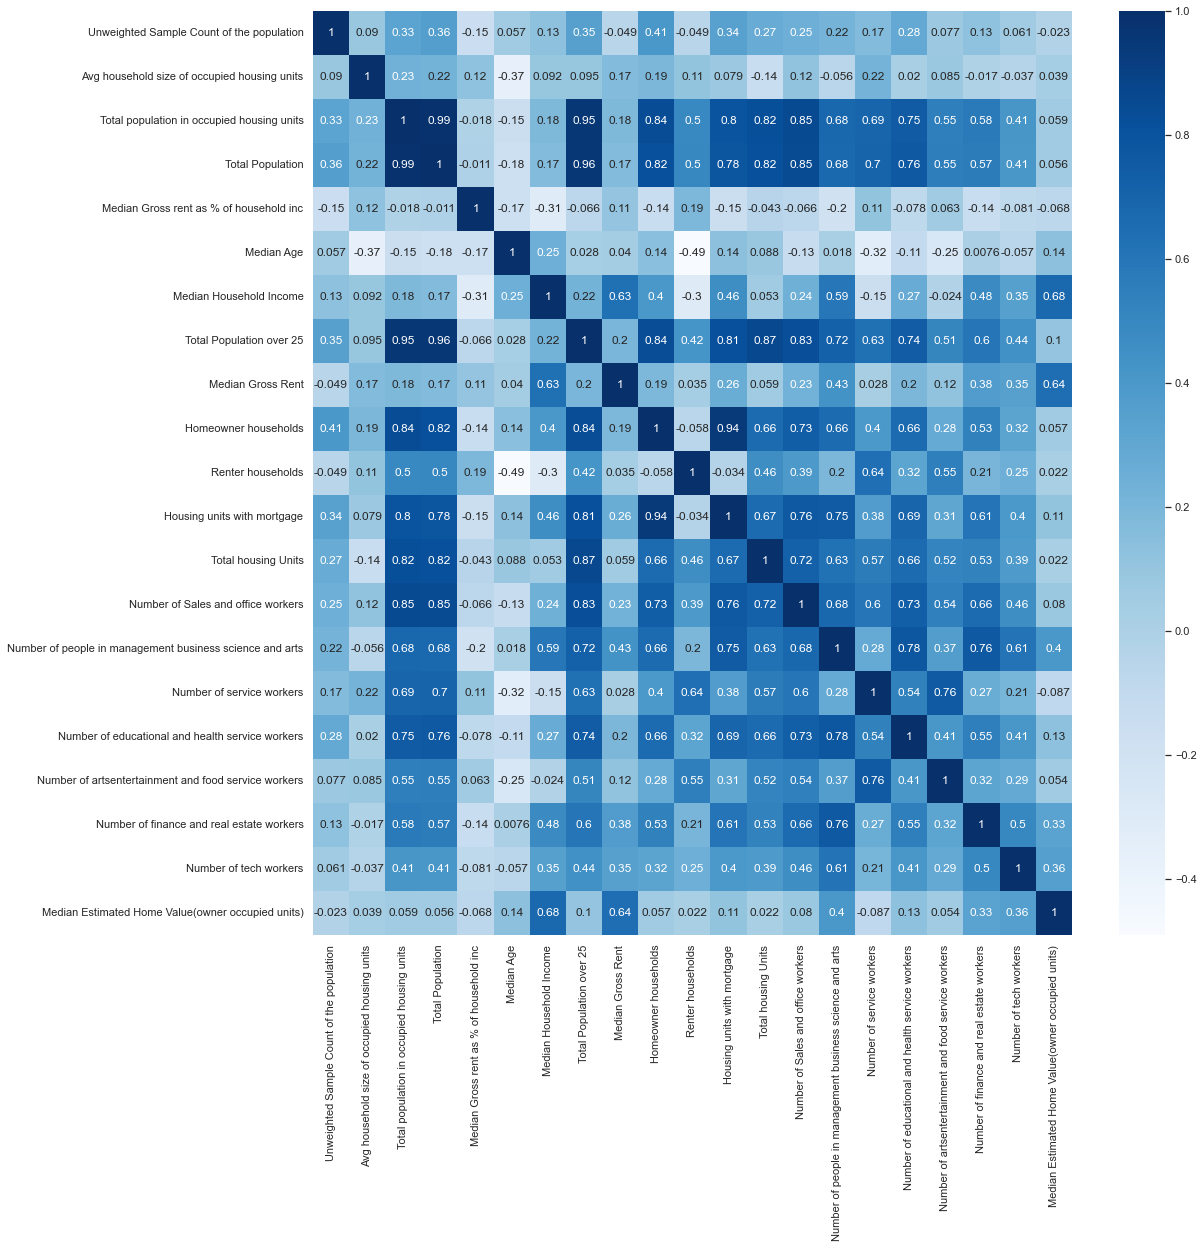

In [23]:
"""Do a correlation plot of the correlation amongst the features and the dependent variable for all pairs of combinations to get 
an idea about any patterns"""
# Get the correlation matrix
corr =  df.iloc[:,2:].corr()
# Set the figure size
sns.set(rc = {'figure.figsize':(17,17)})
# Plot the correlation as a heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True,cmap="Blues")

<div style="text-align: justify">
If just the last column in the above heatmap is observed, it can be seen that the features "Median Household Income", "Median Gross Rent" have the highest correlations with the dependent variable. At this point, features can be eliminated i.e features that have very low correlation can be ideally eliminated. However, I am not going to remove any of them for this challenge. This is because the tree based classifiers that I am going to use to model the data would give feature importances for all the features in the dataset once the models are fitted, which I think will render more explainability and will give more insights into the demographics/behaviour of different regions, since different models are going to be trained for different states. It could be possible that some features may have strong correlation with the dependent variable for some state, but may have very low correlation for all the other states in the US, causing the overall correlation to be small. In the future, some of the irrelevant features could be removed and the models could be retrained with the features that have higher correlation with the output.
</div>

### Modelling
<br>
<div style="text-align: justify">
Now, it is time to build the model once the data is ready. It is important to note that before it is decided as to which model is to be used, it needs to be determined if this is a regression or a classification problem. In this case, the dependent variable is a continuous variable, and hence, this is a regression problem. Once this is decided, there are a plethora of models that could be tried out. However, I like to start of with tree based methods like Random Forests or Gradient Boosting, since I have used them in the past and they have worked pretty well. Using Ensemble models help prevent overfitting to an extent as well. Further, Random Forest and Xgboost also allow for the calculation of feature importances, which is also a nice aspect of these models, since we can visualize which features are the most relevant. 
    
<br>
The next aspect I would like to add here is that its important to have training and test sets, so that the model performance could be evaluated reliably. Here, the data is actually a time series, hence, I would always follow the "Walk-forward" approach. This means that I would split the train and test set on the basis of the timestamp or years. In this case, since we have only 5years of data, I am going to use 4 years worth of data for training and 1 year worth of data for testing. This means that the independent variables for the years 2012-2015 would go into the training set and the dependent variables along with that will be for the years 2013-2016 (because of the shifting). The test set independent variables will have data for the year 2016, and the dependent variable will be for the year 2017.

<br>
Now that the data has been split into train and test set seperately based on the years. The model needs to be trained. In this case, I have decided to train a different model for every state. This is because the demographics/dynamics of each state could be different and hence, it is better to have a model for each state. There will be a total of 51 model (District of Columbia is also given as a state in the dataset). For each model, the data will be split into train and test sets as described in the previous paragraph.  
    
For a model, I encode the categorical columns (there are no categorical columns used, but I have written a generalized function, should there be one in the future) and then convert it to a pipleline, so that it can be used for testing. 
</div>

In [50]:
"""this function filters the dataframe passed to it based on the statename passed to it and then splits it into the train 
test set as described"""
def get_state_df(df,state,test_year):
    """
    inputs:
    df: the dataframe obtained after the cleaning steps
    state: the current state name under consideration (string)
    test_year: the year in the data that is suppposed to be used for testing (integer)
    
    returns:
    x_train: the training data (independent variable)
    y_train: the training data (dependent variable)
    x_test:  the testing data (independent variable)
    y_test:  the testing data (dependent variable)
    """
    
    
    # filter out the rows for this state
    df_temp = df[df["state"] == state]
    
    # split into train and test based on the year. The year passed will be the final yea
    # which goes into the test set
    df_train = df_temp[df_temp["Year"]!=test_year]
    df_test = df_temp[df_temp["Year"]==test_year]
    
    # drop the state coilumn as it is no longer needed
    df_train.drop('state', axis=1, inplace=True)
    df_test.drop('state', axis=1, inplace=True)
    
    # drop the "Year" column as it is no longer needed
    df_train.drop('Year', axis=1, inplace=True)
    df_test.drop('Year', axis=1, inplace=True)
    
    # split into train and test set
    x_train, y_train = df_train.iloc[:,:-1], df_train.iloc[:,-1]
    x_test, y_test =  df_test.iloc[:,:-1], df_test.iloc[:,-1]
    
    return x_train, y_train, x_test, y_test

In [53]:
"""this function takes the train and test sets as inputs and builds the entire model pipeline, and returns some variabels
that contain the results""" 
def train_test(x_train, y_train, x_test, y_test, model):
    
    """
    inputs:
    x_train: the training dataframe (independent variable) 
    y_train: the training dataframe (dependent variable)
    x_test:  the testing dataframe (independent variable)
    y_test:  the testing dataframe (dependent variable)
    model: the model used to train (string)
    
    returns:
    r2: the R-squared metric (testing)
    adj_r2: the Adjusted R-squared metric (testing)
    t.values:  the feature importance values for the current model
    rf_regressor:  the trained model
    x_train_zipcodes.values: zip_codes in the training data
    x_test_zipcodes.values: zip_codes in the testing data
    
    """
    
    # pop out the zipcodes, this is not needed for training, but will be required later
    x_train_zipcodes = x_train.pop("zip_code")
    x_test_zipcodes = x_test.pop("zip_code")
    
    """seperate out any categorical features to be encoded"""
    features_to_encode = x_train.columns[x_train.dtypes==object].tolist() 

    """One hot encode the categorical features"""
    col_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),features_to_encode),remainder = "passthrough")

    """Initialize a Random Forest/XGboost regression model"""
    if model == "random forest":
        rf_regressor = RandomForestRegressor(n_estimators=100)        
    elif model == "xgboost":
        rf_regressor = xgb.XGBRegressor()
    
    """Create a Pipeline and fit the model"""
    pipeline = make_pipeline(col_trans, rf_regressor)
    pipeline.fit(x_train, y_train)

    """Predict on the test set"""
    y_pred = pipeline.predict(x_test)

    """Calculate the R-squared and the Adjusted R-squared on the test set"""
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2) * (len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
    print('Model R-squared: ',r2)
    print("Model Adjusted R-squared is {}".format(adj_r2))

    """To calculate feature importances"""
    def encode_and_bind(original_dataframe, features_to_encode):    
        dummies = pd.get_dummies(original_dataframe[features_to_encode])
        res = pd.concat([dummies, original_dataframe], axis=1)
        res = res.drop(features_to_encode, axis=1)
        return(res)
    x_train_encoded = x_train#encode_and_bind(x_train, features_to_encode)

    """Zip and Sort sort the feature importances by most important first"""
    feature_importances = list(zip(x_train_encoded, rf_regressor.feature_importances_))
    feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # [print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];


    """Plot Feature importances"""
#     fig, axes = plt.subplots(1,1,figsize=(10,5))
    t = pd.DataFrame(feature_importances_ranked, columns = ['Feature','Importances'])
#     sns.barplot(y='Importances', x="Feature",data =t)
#     axes.set_xticklabels(axes.get_xticklabels(), rotation=40, ha="right")
#     plt.show()
    
    """return the required values"""
    return r2,adj_r2, t.values, rf_regressor, y_pred, x_train_zipcodes.values, x_test_zipcodes.values

<div style="text-align: justify">
The following code iterates through each state and fits to the models for each state and prints the R-squared and the Adjusted R-squared, and does a plot for the feature importances. Some of the results are stored in a dictionary for future use. In the training function above, two models are available. The appropriate model name could be passed to train its corresponding model. For now, the XGboost model is trained, since it trains faster. The Random forest model was also tried, but takes more time to run.
</div>

In [54]:
# get the unique state names
state_names = df["state"].unique()

# iterate through each state and fit a model
final_result = {}
for state_name in state_names:
    print(state_name)
    # get the train and test sets
    x_train, y_train, x_test, y_test= get_state_df(df,state_name,2016)
    # build the model pipeline
    r2, adj_r2, t, rf_regressor, y_pred, train_zipcodes, test_zipcodes = train_test(x_train, y_train, x_test, y_test,"xgboost")
    
    # save the results for this state
    state_result = {}
    state_result['r_squared'] = r2
    state_result['adjusted_r_squared'] = adj_r2
    state_result['feature_importances'] = t
#     state_result['model'] = rf_regressor
    state_result['predictions'] = y_pred
    state_result['train_zipcodes'] = train_zipcodes
    state_result['test_zipcodes'] = test_zipcodes
    
    # save the state details to a master dictionary
    final_result[state_name] = state_result

Alabama
Model R-squared:  0.8570163620086062
Model Adjusted R-squared is 0.8564007166351233
Alaska
Model R-squared:  0.8780038896272213
Model Adjusted R-squared is 0.8740429769527804
Arizona
Model R-squared:  0.8557737008775267
Model Adjusted R-squared is 0.8552837185465517
Arkansas
Model R-squared:  0.8445889717718862
Model Adjusted R-squared is 0.8434386310744169
California
Model R-squared:  0.8332932984980865
Model Adjusted R-squared is 0.8331866573968539
Colorado
Model R-squared:  0.8116178880383318
Model Adjusted R-squared is 0.8108410545869434
Connecticut
Model R-squared:  0.9134548980688848
Model Adjusted R-squared is 0.9129206690446187
Delaware
Model R-squared:  0.8876890415095107
Model Adjusted R-squared is 0.8849860100175615
District of Columbia
Model R-squared:  0.885594561307653
Model Adjusted R-squared is 0.8821997411684143
Florida
Model R-squared:  0.7889104475016824
Model Adjusted R-squared is 0.7886540997544016
Georgia
Model R-squared:  0.8672763253144722
Model Adjusted

<div style="text-align: justify">
The above output cell shows the output for all the models trained for each state. The graph for the feature importances is shown for each state. Further, the R-squared and the Adjusted-square values are printed out. The R-squared value indicates the goodness of fit for the model (it has been calculated using the test set). It explains how much of the variance in the data, the model is able to explain. As we add more features to a model, the R-squared value tends to increase. The adjusted R-square penalizes the model for adding too many irrelevant features on the other hand. It can be observed that majority of the models have an R-squared and an Adjusted R-squared value above 0.85, which indicates that the model is doing pretty well and the hypothesis/assumption made using the shifting technique seems valid. The adjusted R-squared value is generally the same as the R-squared value and the model doesn't seem to be overfitting as such here. The values are printed for each state as below. 
</div>

In [29]:
# collect and print the results statewise
df_results = {"state":[],"r_squared":[],"adjusted_r_squared":[]}
for key in final_result.keys():
    df_results["state"].append(key)
    df_results["r_squared"].append(final_result[key]["r_squared"])
    df_results["adjusted_r_squared"].append(final_result[key]["adjusted_r_squared"])

# convert to a datafra,e
df_results = pd.DataFrame(df_results)

# print the mean values for the metrics
print("The mean R-squared value is {}".format(df_results["r_squared"].mean()))
print("The mean Adjusted R-squared value is {}".format(df_results["adjusted_r_squared"].mean()))

display(df_results)

The mean R-squared value is 0.8545427557661673
The mean Adjusted R-squared value is 0.8530726452824094


,state,r_squared,adjusted_r_squared
0,Alabama,0.857016,0.856401
1,Alaska,0.878004,0.874043
2,Arizona,0.855774,0.855284
3,Arkansas,0.844589,0.843439
4,California,0.833293,0.833187
5,Colorado,0.811618,0.810841
6,Connecticut,0.913455,0.912921
7,Delaware,0.887689,0.884986
8,District of Columbia,0.885595,0.882200
9,Florida,0.788910,0.788654


Next, the R-squared and the Adjusted R-squared metrics are plotted for every state

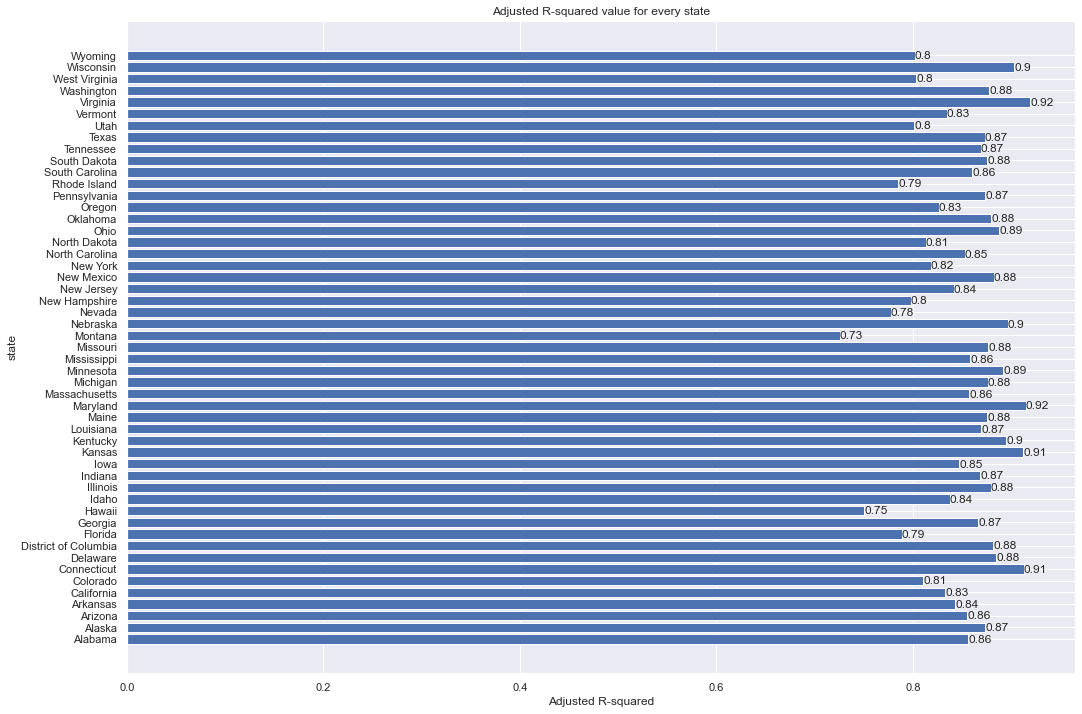

In [30]:
fig, axes = plt.subplots(1,1,figsize=(17,12))
# plot the bar plot
plt.barh(df_results["state"],df_results["adjusted_r_squared"])
# df_final[["zip_code","ROI %"]].iloc[:10,:].plot(kind='barh',y='zip_code',x='ROI %',color='r')
plt.xlabel("Adjusted R-squared")
plt.ylabel("state")
plt.title("Adjusted R-squared value for every state")

# give the value for the plots
for index, value in enumerate(df_results["adjusted_r_squared"]):
    plt.text(value, index - 0.3, str(round(value,2)))
plt.show()

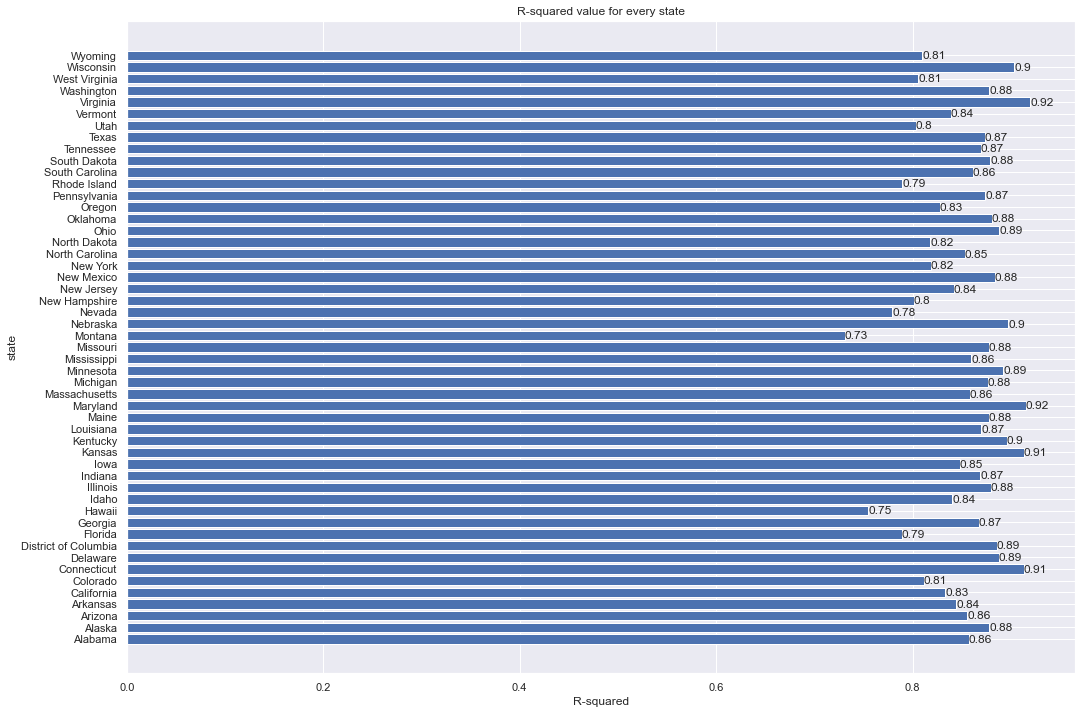

In [31]:
fig, axes = plt.subplots(1,1,figsize=(17,12))
# plot the bar plot
plt.barh(df_results["state"],df_results["r_squared"])
# df_final[["zip_code","ROI %"]].iloc[:10,:].plot(kind='barh',y='zip_code',x='ROI %',color='r')
plt.xlabel("R-squared")
plt.ylabel("state")
plt.title("R-squared value for every state")

# give the value for the plots
for index, value in enumerate(df_results["r_squared"]):
    plt.text(value, index - 0.3, str(round(value,2)))
plt.show()

<div style="text-align: justify">
<b>Next, coming back to the main idea/task, the intention was to estimate the zip_codes which would be profitable for investment. The predictions for the dependent variable "Median Estimated Home Value(owner occupied units)" made by the model are for the for the year 2017. In a real life scenario, the predictions for the house price values made by the model for the future could be compared with the values for the previous years to calculate the Return on investment. In this case, after the model makes predictions for the home values for the year 2017, I am going to compare this value with the mean of the home values for the years 2012-2015 (which are actually the values for 2013-2016 because of the shifting). By comparison, I mean calculating the Return on investment of the predicted house price value with the mean house price over the past few years (based on zip code). A positive percentage value would indicate profits, and a potentially good investment, if this value is high. There could be better ways to evaluate as well possibly (I would talk to a finance expert, one who has better domain knowledge). For this challenge, this seems to be good. In summary, for a particular zipcode, the 4 year average house price value (from the column "Median Estimated Home Value(owner occupied units")) is calculated and this value is going to be assumed as the initial investment. The predicted "Median Estimated Home Value(owner occupied units") from the model for the year 2017 is then used as the Final price of the house when the property/house is supposedly about to be sold. Then the Return on investment is going to be given by the formula ROI = 100*(Final cost - Initial investment cost)/Initial investment cost </b>
</div>

In [32]:
# collect the dependent variable for all the years < 2016
df_infer = df[["zip_code","Year","Median Estimated Home Value(owner occupied units)"]]
df_infer = df_infer[df_infer["Year"]<2016]
df_infer.drop('Year', axis=1, inplace=True)
df_infer

,zip_code,Median Estimated Home Value(owner occupied units)
0,36067,124800.0
1,36067,129200.0
2,36067,113800.0
3,36067,130500.0
4,36066,177000.0
...,...,...
284455,82945,116800.0
284456,83012,690000.0
284457,83001,715800.0
284458,83014,932100.0


In [33]:
# group the data by using the mean() for a zipcode as the aggregrate function a described above
df_infer = df_infer.groupby(["zip_code"]).mean().reset_index()
df_infer

,zip_code,Median Estimated Home Value(owner occupied units)
0,10001,9.945326e+05
1,10002,6.132951e+05
2,10003,9.292252e+05
3,10004,8.030750e+05
4,10007,1.344238e+06
...,...,...
21784,99903,1.698000e+05
21785,99919,1.676000e+05
21786,99921,2.041250e+05
21787,99926,1.205750e+05


Thus, above are the mean values of the Median home values from the year 2012-2015 (actually 2013-2016 due to the shifting)

Next, I extract the data from the predictions made for the year 2017, using features/dependent variables from the year 2016 

In [34]:
# create lists to save the values
zip_codes = []
predictions = []
state = []
# iterate through each state
for key in final_result.keys():
    # add the zipcodes, predictions and the states to a list
    state += [key]*len(final_result[key]["test_zipcodes"])
    zip_codes += list(final_result[key]["test_zipcodes"])
    predictions += list(final_result[key]["predictions"])

# convert to a dictionary
d = {}
d["zip_code"] = zip_codes
d["predictions for Median Estimated Home Value(owner occupied units)"] = predictions
d["state"] = state
# convert the prediction dictionary to a dataframe
df_pred = pd.DataFrame(d)
df_pred.sort_values(by=["zip_code"],inplace = True)
df_pred

,zip_code,predictions for Median Estimated Home Value(owner occupied units),state
45126,10001,1.533971e+06,New York
45290,10001,1.034933e+06,New York
45275,10001,1.291226e+06,New York
45293,10001,1.269528e+06,New York
45294,10001,6.611351e+04,New York
...,...,...,...
1273,99903,1.882454e+05,Alaska
1262,99919,1.610792e+05,Alaska
1263,99921,1.953031e+05,Alaska
1264,99926,1.247786e+05,Alaska


In [35]:
# group the data by using the mean() for a zip_code using the model predictions
df_pred = df_pred.groupby(["state","zip_code"]).median().reset_index()
df_pred

,state,zip_code,predictions for Median Estimated Home Value(owner occupied units)
0,Alabama,35004,163515.921875
1,Alabama,35005,118035.554688
2,Alabama,35006,107293.062500
3,Alabama,35007,182045.109375
4,Alabama,35010,97285.953125
...,...,...,...
21735,Wyoming,83014,763602.750000
21736,Wyoming,83101,213638.906250
21737,Wyoming,83110,206337.109375
21738,Wyoming,83111,257952.187500


Thus, above are the predicted home values for each zip code for the year 2017, using independent variables from 2016

## TOP 10 ZIP CODES TO INVEST IN
<br>
<div style="text-align: justify">
Now, we have 2 dataframes. The first dataframe "df_infer" has a zipcode in each row and its correponding average value for the "Median Estimated Home Value(owner occupied units)" for the years 2012-2015 (actually 2013-2016 due to the shifting)). The second dataframe "df_pred" has a zipcode in each row and its correponding predicted value for the "Median Estimated Home Value(owner occupied units)" for the years 2016 (Actually 2017 due to shifting). These two dataframes are joined using the "zip_code" as the primary key. The Return on Investment (ROI) is calculated as the difference between the "predictions for Median Estimated Home Value(owner occupied units)" and the mean "for Median Estimated Home Value(owner occupied units)" divided by the "for Median Estimated Home Value(owner occupied units)" as a percentage. The value are sorted based on the ROI % and the top 10 zip codes are printed.
</div>

In [36]:
# merge the above two dataframes created
df_final = df_infer.merge(df_pred,on="zip_code",how="inner")
# calculate the return on investment (ROI).
df_final["ROI %"] = (df_final["predictions for Median Estimated Home Value(owner occupied units)"] - df_final["Median Estimated Home Value(owner occupied units)"])*100/df_final["Median Estimated Home Value(owner occupied units)"]
# sort the value based on the ROI
df_final.sort_values(by = ["ROI %"],ascending = False,inplace = True)
df_final.iloc[:10,:]

,zip_code,Median Estimated Home Value(owner occupied units),state,predictions for Median Estimated Home Value(owner occupied units),ROI %
16174,75057,17575.0,Texas,71868.132812,308.922520
19033,8733,68125.0,New Jersey,275498.500000,304.401468
21472,98508,32050.0,Washington,126946.359375,296.088485
15135,70712,27650.0,Louisiana,85790.843750,210.274299
19758,92068,116825.0,California,351884.781250,201.206746
1177,14642,132650.0,New York,390167.000000,194.132680
12568,59108,47825.0,Montana,139805.468750,192.327169
6376,33689,68875.0,Florida,196559.046875,185.385186
16298,75372,107325.0,Texas,305624.937500,184.765840
9051,44504,17975.0,Ohio,49721.621094,176.615416


Plot the top 10 zip codes to invest in below

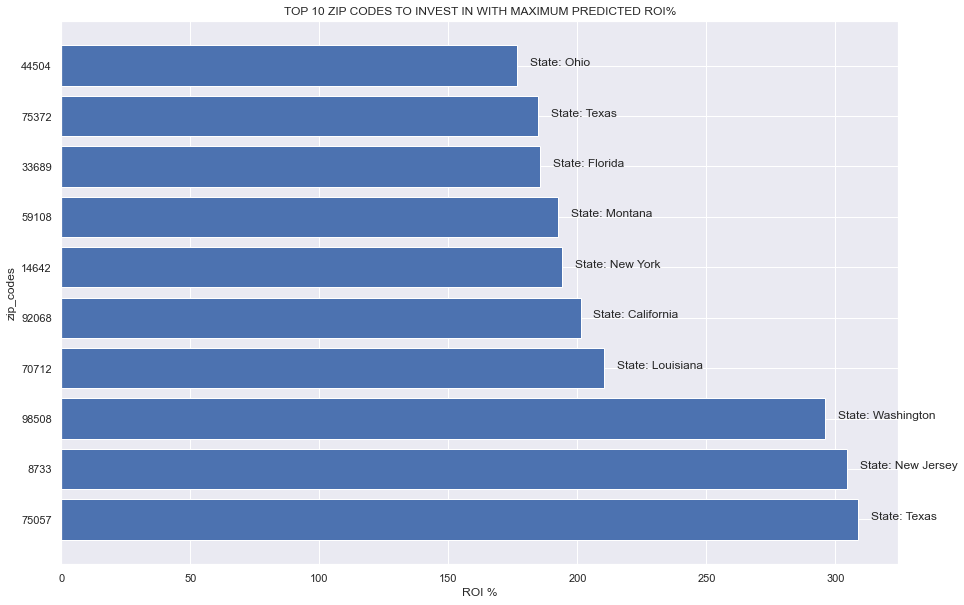

In [37]:
fig, axes = plt.subplots(1,1,figsize=(15,10))
# plot the bar plot
plt.barh(df_final.iloc[:10,:]["zip_code"],df_final.iloc[:10,:]["ROI %"])
# df_final[["zip_code","ROI %"]].iloc[:10,:].plot(kind='barh',y='zip_code',x='ROI %',color='r')
plt.xlabel("ROI %")
plt.ylabel("zip_codes")
plt.title("TOP 10 ZIP CODES TO INVEST IN WITH MAXIMUM PREDICTED ROI%")
# give the statenames as well on the plot for the zipcodes
states = iter(df_final.iloc[:10,:]["state"])
for index, value in enumerate(df_final.iloc[:10,:]["ROI %"]):
    plt.text(value +5 , index, "State: {}".format(next(states)))
plt.show()

### General Visualizations for geographically close zip codes
<br>
<div style="text-align: justify">
From general common sense, one could suspect that geographically close zip codes may have similar property values. Hence the model predictions could be visualized to verify this. Verifying them on the map makes the most sense. In the section below, I have visualized the predictions for the "Median Estimated Home Value(owner occupied units)" for Houston (I tried other regions too, but their map boundary information was not available in the format needed). In order to do this, I have gathered their latitudes and longitudes from Google and then I have used the Folium libray in Python to visualize them using the zip code information available. The map boundaries were downloaded (.geojson extension) for these regions from the web from the ArcGIS (open source).
</div>

In [38]:
# just display the df_final data frame that has the predictions for the home values
df_final

,zip_code,Median Estimated Home Value(owner occupied units),state,predictions for Median Estimated Home Value(owner occupied units),ROI %
16174,75057,17575.000000,Texas,71868.132812,308.922520
19033,8733,68125.000000,New Jersey,275498.500000,304.401468
21472,98508,32050.000000,Washington,126946.359375,296.088485
15135,70712,27650.000000,Louisiana,85790.843750,210.274299
19758,92068,116825.000000,California,351884.781250,201.206746
...,...,...,...,...,...
16268,75220,352110.785714,Texas,136329.828125,-61.282121
7153,36644,259625.000000,Alabama,89718.914062,-65.442883
723,12749,170500.000000,New York,58323.367188,-65.792747
1035,14129,53775.000000,New York,-13069.145508,-124.303385


In [39]:
# the zip codes for Houston start with 770 and 772, hence, filter out only these rows
df_houston = df_final[(df_final["zip_code"].str.startswith('770')) | (df_final["zip_code"].str.startswith('772'))].copy()
df_houston

,zip_code,Median Estimated Home Value(owner occupied units),state,predictions for Median Estimated Home Value(owner occupied units),ROI %
16835,77079,291335.000000,Texas,500570.000000,71.819383
16863,77208,237225.000000,Texas,362376.843750,52.756600
16872,77242,56175.000000,Texas,85211.492188,51.689350
16819,77062,182893.750000,Texas,276872.968750,51.384598
16886,77282,150925.000000,Texas,212523.593750,40.814043
...,...,...,...,...,...
16837,77081,190865.714286,Texas,138787.656250,-27.285182
16877,77261,138800.000000,Texas,98807.039062,-28.813372
16782,77025,482400.000000,Texas,297106.156250,-38.410830
16820,77063,403134.315789,Texas,219849.843750,-45.464865


In [40]:
# get the map for Houston area from the latitudes and longitudes found from the Web
maps_viz = folium.Map(location=[29.7604 ,-95.3698], default_zoom_start=0)
maps_viz

## This map below is a screenshot of the above map that was supposed to be displayed, just in case the map is not displayed. (The map disappears when uploaded on github due to security mechanisms in place)
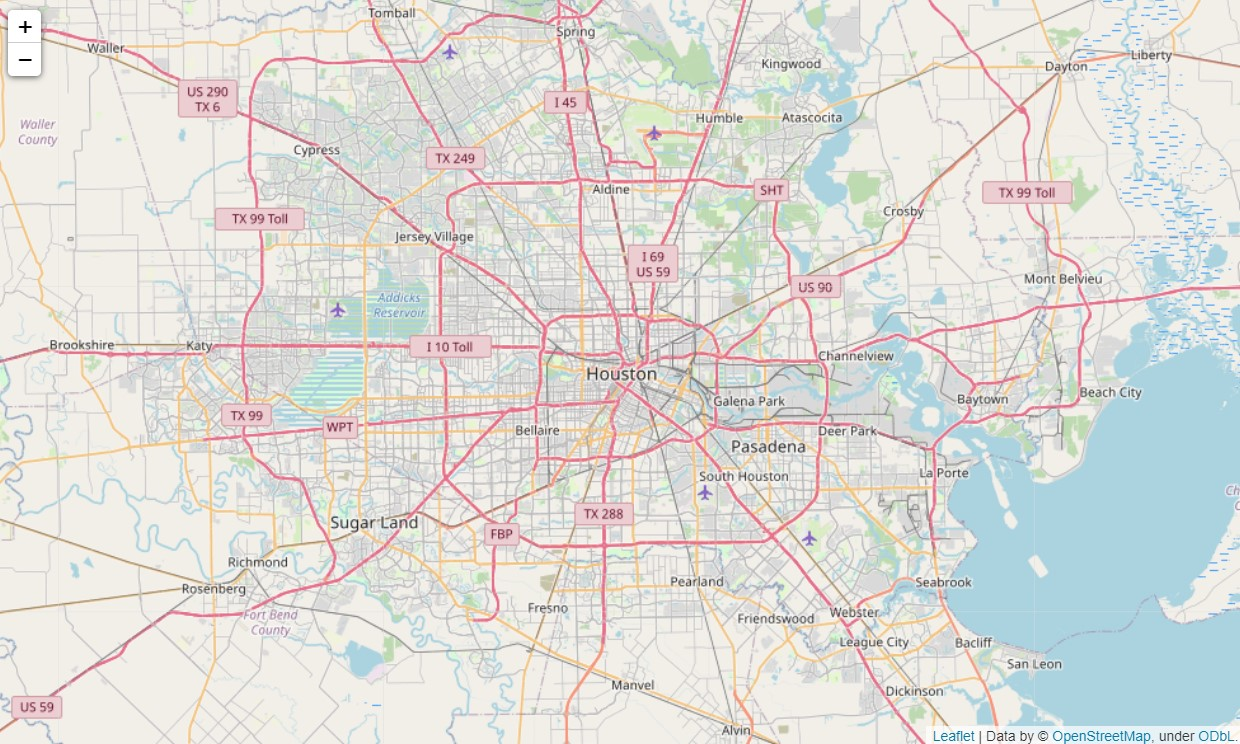

In [41]:
# show the regions predicted sales as a heat map using the map boundaries downloaded and the dataframe df_houston
df_houston["zip_code"] = df_houston["zip_code"].astype(int)
maps_viz.choropleth(geo_data="Zip_Codes.geojson",
               data=df_houston, 
               columns=['zip_code', 'predictions for Median Estimated Home Value(owner occupied units)'], 
               key_on='feature.properties.ZIP_CODE', 
               fill_color='YlGnBu',fill_opacity=0.7,line_opacity=0.2,
               legend_name='Estimated House price Value for 2017')
maps_viz

## This map below is a screenshot of the above map that was supposed to be displayed, just in case the map is not displayed. (The map disappears when uploaded on github due to security mechanisms in place)
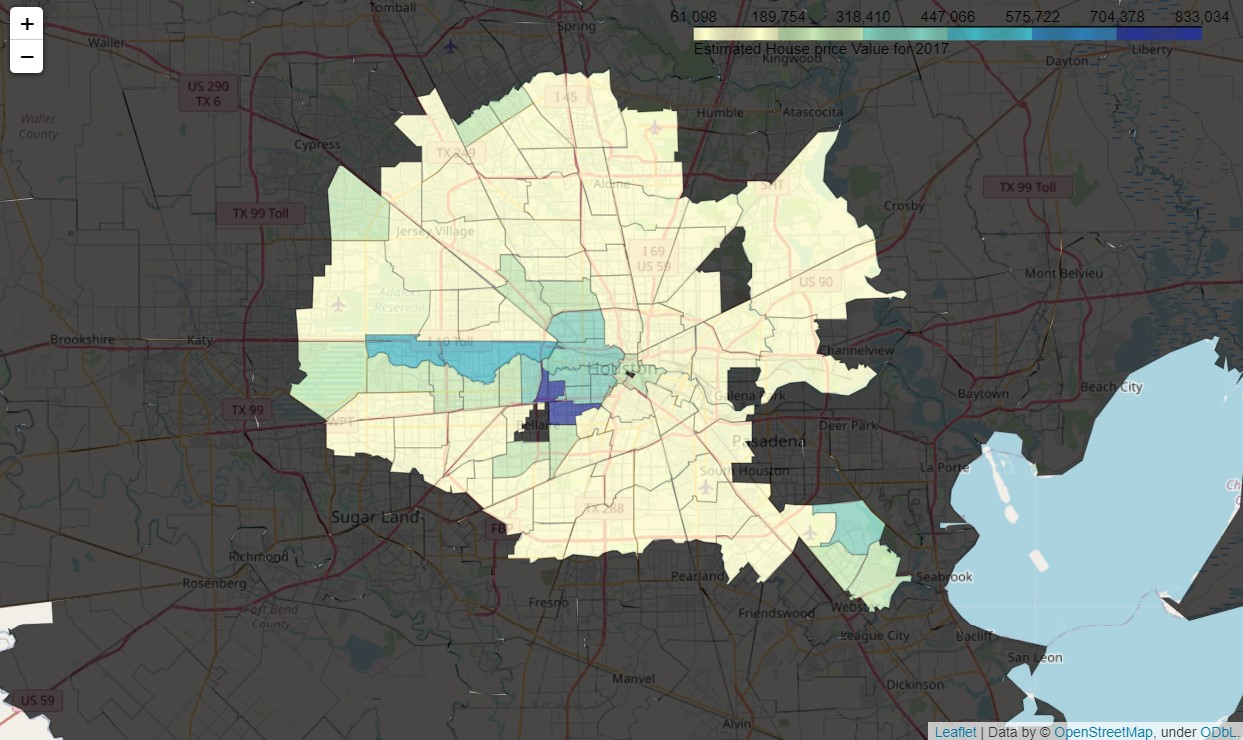

<div style="text-align: justify">
In the above graph, the predictions for the house prices have been plotted for the Houston region. The dark regions are those that are not a part of Houston or they do not have data/predictions from the census data. Generally, it can be seen that areas/zipcodes close by have similar range of house prices (scale on the top right corner). Some zipcodes have high house prices and areas close by then have high prices too (green areas). Similar inferences can be made for the areas that have relatively lower house prices. This is because geographically close by regions may have similar demographics. Similar analyis could be done for the other regions as well
</div>

<div style="text-align: justify">
Next, I have also tried to visualize the features for the zip codes that are actually close to each other by observing an actual map of zip codes in the Pittsburgh region. I have grouped the feature values by taking the mean of the features within a zip code for the year 2016.
</div>

In [42]:
# filter out rows for the specified zip codes
pitt_zipcodes = ["15224","15232","15213","15219","15260"]
df_pitt = df[(df["zip_code"].isin(pitt_zipcodes)) & (df["Year"] == 2016)]
df_pitt

,zip_code,Year,state,Unweighted Sample Count of the population,Avg household size of occupied housing units,Total population in occupied housing units,Total Population,Median Gross rent as % of household inc,Median Age,Median Household Income,...,Housing units with mortgage,Total housing Units,Number of Sales and office workers,Number of people in management business science and arts,Number of service workers,Number of educational and health service workers,Number of artsentertainment and food service workers,Number of finance and real estate workers,Number of tech workers,Median Estimated Home Value(owner occupied units)
338153,15219,2016,Pennsylvania,794.0,1,527,6491,32,21,22292.0,...,16,455,323,658,482,614,292,31,42,85000.0
338156,15219,2016,Pennsylvania,181.0,1,2196,2292,32,40,18730.0,...,175,1240,119,275,227,300,11,20,21,119200.0
338157,15219,2016,Pennsylvania,220.0,1,1186,1609,33,24,16250.0,...,91,725,101,271,116,219,73,24,3,73400.0
338158,15213,2016,Pennsylvania,196.0,1,1905,1977,50,27,24803.0,...,86,1429,97,496,92,311,102,74,19,123400.0
338159,15213,2016,Pennsylvania,308.0,2,3100,3724,50,21,17275.0,...,34,1254,422,641,726,950,487,37,20,177100.0
338160,15213,2016,Pennsylvania,156.0,2,1938,1938,50,22,19659.0,...,12,1082,281,487,291,508,243,70,16,111800.0
338162,15219,2016,Pennsylvania,214.0,2,2058,2087,28,35,19608.0,...,135,1122,214,167,266,293,81,81,6,82000.0
338163,15213,2016,Pennsylvania,128.0,1,1751,1772,29,54,36642.0,...,224,1169,134,252,207,355,37,48,24,103600.0
338164,15224,2016,Pennsylvania,237.0,1,2506,2533,26,33,51964.0,...,344,1315,300,738,309,446,125,72,71,160700.0
338165,15219,2016,Pennsylvania,220.0,1,1299,1299,29,37,36786.0,...,186,805,138,432,155,222,141,11,79,118100.0


Group the features by the zip code, using the mean as the aggregate function

In [43]:
df_pitt = df_pitt.groupby(["zip_code"]).mean().reset_index()
df_pitt.drop('Year', axis=1, inplace=True)
df_pitt

,zip_code,Unweighted Sample Count of the population,Avg household size of occupied housing units,Total population in occupied housing units,Total Population,Median Gross rent as % of household inc,Median Age,Median Household Income,Total Population over 25,Median Gross Rent,...,Housing units with mortgage,Total housing Units,Number of Sales and office workers,Number of people in management business science and arts,Number of service workers,Number of educational and health service workers,Number of artsentertainment and food service workers,Number of finance and real estate workers,Number of tech workers,Median Estimated Home Value(owner occupied units)
0,15213,219.166667,1.333333,2385.666667,2579.000000,44.500000,29.833333,26914.666667,1168.500000,956.666667,...,148.000000,1423.166667,229.833333,709.833333,288.333333,640.500000,186.833333,63.333333,24.166667,154450.000000
1,15219,306.500000,1.166667,1794.500000,2880.666667,30.500000,30.833333,27083.833333,1570.000000,768.333333,...,197.166667,1136.500000,229.000000,561.166667,273.666667,400.333333,162.666667,85.500000,30.166667,116266.666667
2,15224,228.000000,1.000000,1942.000000,1951.000000,26.333333,32.333333,43373.333333,1581.333333,838.333333,...,239.333333,1111.000000,230.666667,537.000000,208.000000,317.333333,105.666667,73.000000,44.333333,122533.333333
3,15232,238.200000,1.200000,2200.000000,2256.800000,28.800000,32.000000,58683.400000,1681.200000,1018.200000,...,221.000000,1364.600000,195.000000,887.800000,152.200000,599.600000,130.000000,80.600000,23.200000,308560.000000
4,15260,267.666667,1.666667,2706.333333,2747.333333,34.333333,33.666667,54136.000000,1783.333333,956.333333,...,272.333333,1516.000000,194.333333,921.666667,201.000000,637.333333,131.333333,95.666667,23.333333,244533.333333


Visualize the various features/independent variables for these zipcodes that are close by. 

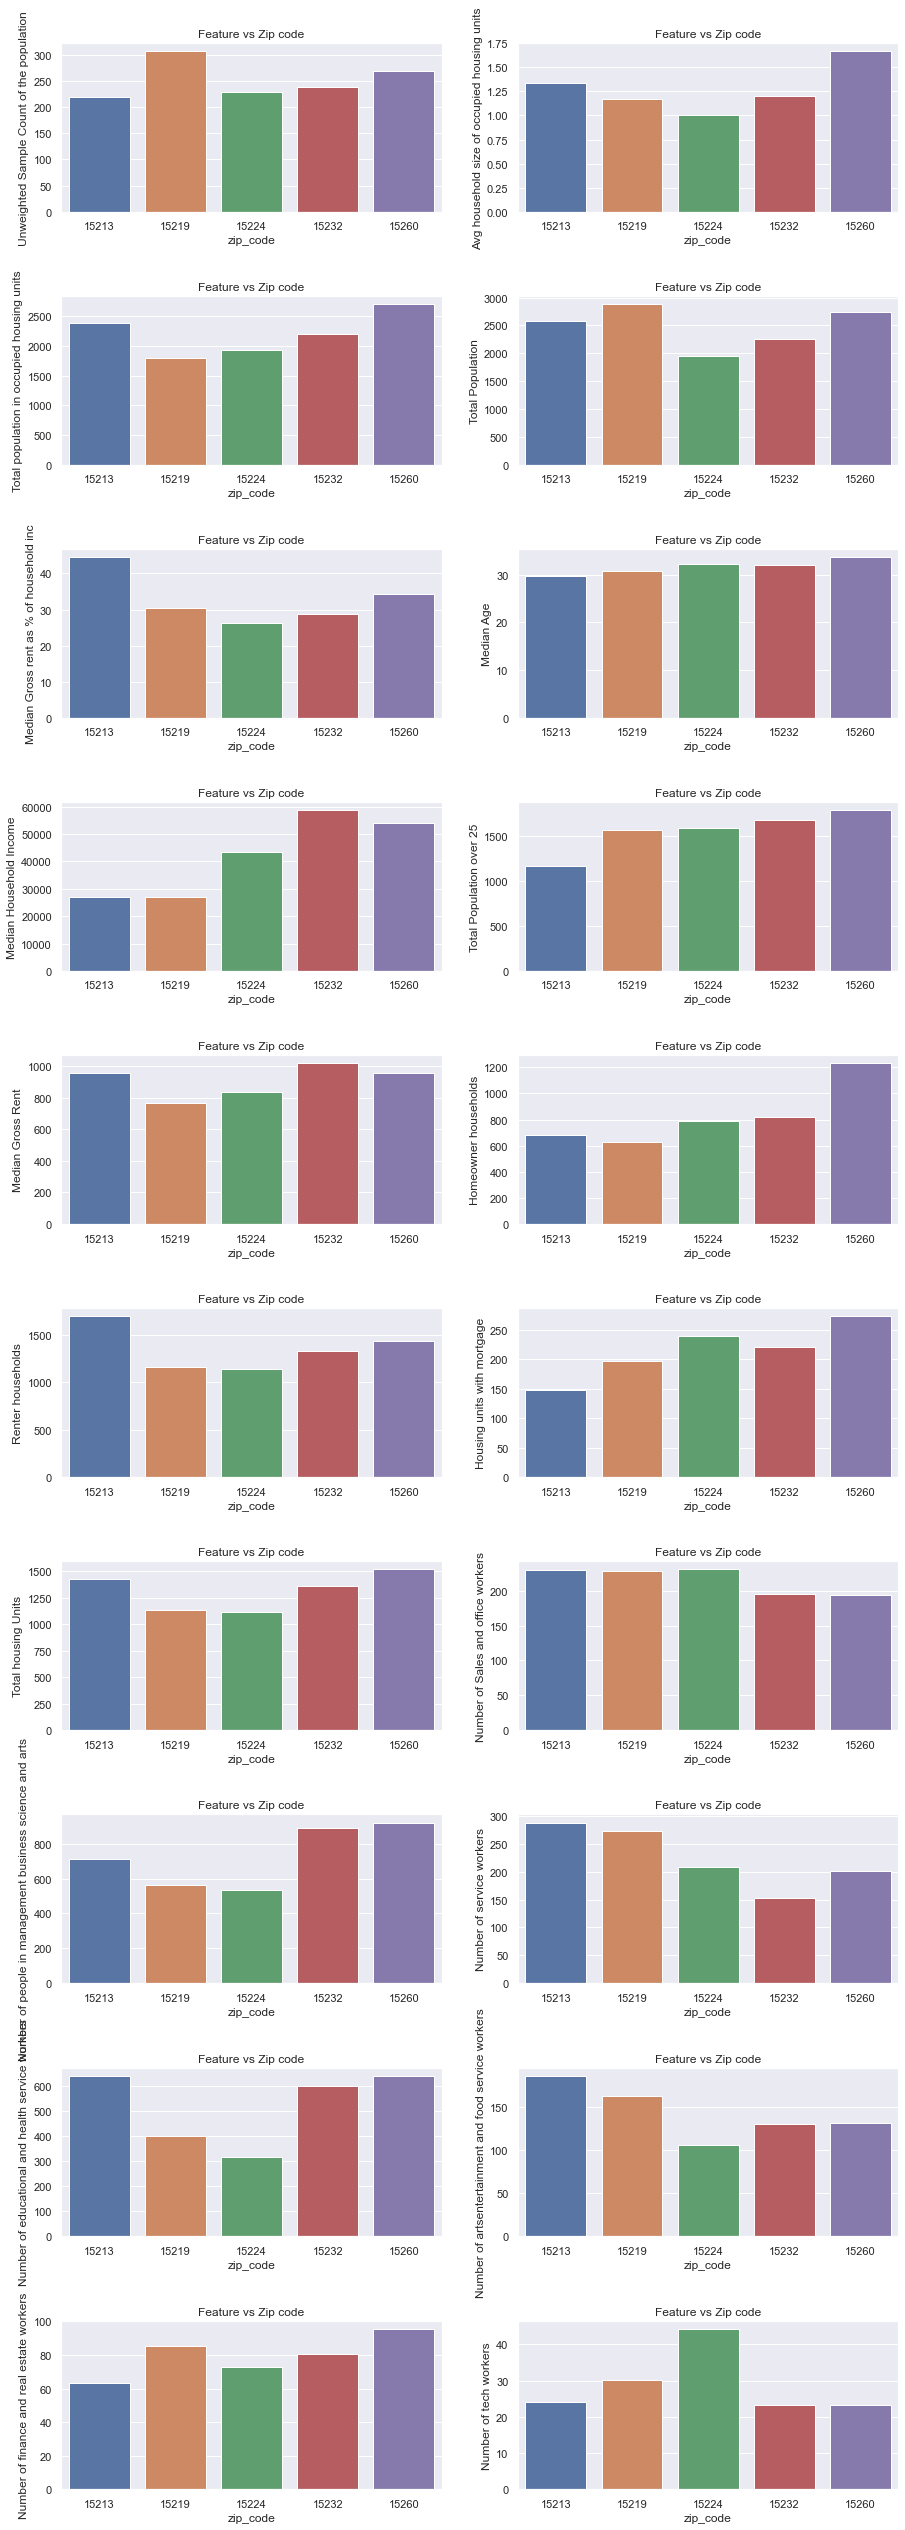

In [44]:
# create the subplots 
fig, axes = plt.subplots(10,2,figsize=(15,45))

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
cols = df_pitt.columns
j = 0
for i in range(1,21,2):
    # plot the first column in the subplot
    sns.barplot(y=cols[i], x="zip_code", data=df_pitt, ax=axes[j][0])
    axes[j][0].set_title("Feature vs Zip code")
    # plot the second column in the subplot
    sns.barplot(y=cols[i+1], x="zip_code", data=df_pitt, ax=axes[j][1])
    axes[j][1].set_title("Feature vs Zip code")
    j += 1

<div style="text-align: justify">
From the above bar plots, it can be observed that zip codes that are close by geographically have almost similar features, with some minor variations in them. The above plots are for 5 zipcodes in the Pittsburgh region. Thus, once again, it can be concluded that zip codes close may have similar returns on investment. Further, in depth anaysis could be done in the future to verify these claims, via more plots, visualizations.
</div>

### Areawise/Statewise Insights 

In this section, I have visualized the feature importances for a few states, as obtained from the trained model.

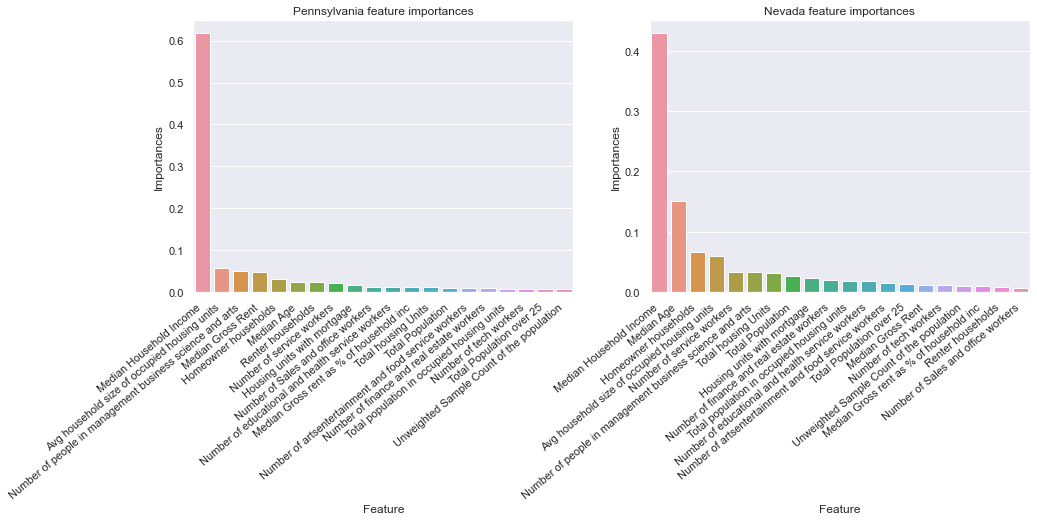

In [45]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
# select the state and filter out the rows for this state
state1 = "Pennsylvania"
t = pd.DataFrame(final_result[state1]['feature_importances'], columns = ['Feature','Importances'])
# plot the bar plot
sns.barplot(ax=axes[0], y='Importances', x="Feature",data =t)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha="right")
axes[0].set_title(state1 + " feature importances")

# select the state and filter out the rows for this state
state2 = "Nevada"
t = pd.DataFrame(final_result[state2]['feature_importances'], columns = ['Feature','Importances'])
# plot the bar plot
sns.barplot(ax=axes[1], y='Importances', x="Feature",data =t)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=40, ha="right")
axes[1].set_title(state2 + " feature importances")
plt.show()

<div style="text-align: justify">
The above plot shows the feature importances for the 2 different states in the US (Pennsylvania and Nevada). The median houshold income is a feature that is highlighted as having a very strong feature importance for predicting the dependent variable. This is the case for many states. As for the other features, it can be seen that the order of importance varies from state to state. This is why it makes sense to have a different model for every state, since the demographics and other factors vary from state to state, causing the value of the properties to change. 
</div>

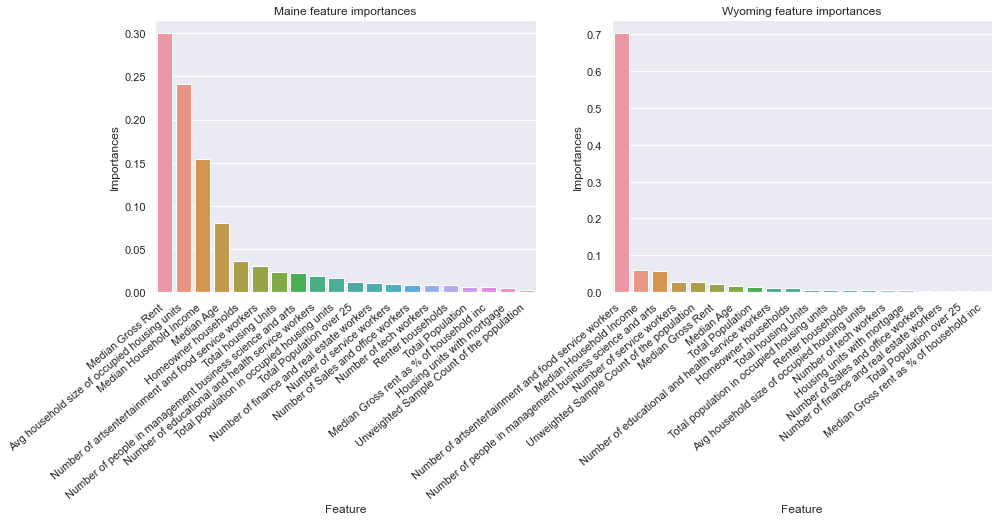

In [47]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
# select the state and filter out the rows for this state
state1 = "Maine"
t = pd.DataFrame(final_result[state1]['feature_importances'], columns = ['Feature','Importances'])
# plot the bar plot
sns.barplot(ax=axes[0], y='Importances', x="Feature",data =t)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=40, ha="right")
axes[0].set_title(state1 + " feature importances")

# select the state and filter out the rows for this state
state2 = "Wyoming"
t = pd.DataFrame(final_result[state2]['feature_importances'], columns = ['Feature','Importances'])
sns.barplot(ax=axes[1], y='Importances', x="Feature",data =t)
# plot the bar plot
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=40, ha="right")
axes[1].set_title(state2 + " feature importances")
plt.show()

<div style="text-align: justify">
Another example is as above. The state of Maine and Wyoming have highest feature importances for different variables, which is another example of why different models are needed for every state. Hence, removing the features that were weakly correlated form the initial correlation plot may also not be a very good idea 
</div>

### Some thoughts on future improvements (If it were a long term project)

Here are a few of the thoughts that would come to my mind for future improvements. The thoughts below are only a subset of thoughts, there could be many more, given a larger timeframe.

#### Feature selection

1. I would probably do more visualizations for the features themselves. Maybe do a few correlation plots statewise, to gain a better understanding about the correlations between the independent and the dependent variables. 
2. I would also read more research papers/articles online to see if there are any features that could be extracted from the already existing data. Maybe also do a hypothesis test for each feature, to understand whether it is statistically significant to the output or the dependent variable
3. Sometimes, it also helps when talking to people who have more domain expertise, to get their view on what features could be useful 
4. I think is would also be very useful to factor in information about factors like property taxes, since they would also play vital role in understanding the return on investment that is achievable. A house may yield more money after selling, however taxes that were paid while the house was owned, needs to be given considerations to. Further, if the properties are rented out, then costs involving maintainance, money gained through rent could be given consideration to as well

#### Model Improvements:
1. More models could be trained by segregating the state further into smaller regions. 
2. For now, since there are 51 models to train, the models (tried both Random Forests and Xgboost) were trained using their default parameters. Ideally, I would run grid search for each of these models, for hyperparameter tuning, the code for which is as below (at the end of the notebook -  only for random forest model tuning. It could be extended for Xgboost as well). Further, I would try other models as well. Linear Regression, Ridge Regression, Lasso Regression, ElasticNet Regression, Support Vector Regressor, K nearest Neighbors Regression, Decision Tree Regression.
3. Feature elimination could be done using techniques like forward, backward regression

#### Data:
1. Validating the data is the MOST important task. A lot of the data may not be reliable, hence, building models and drawing conclusions on the same maybe disastrous/ineffective, causing loss of time/ valuable resources.
2. If there were more time and resources available, I would try to get more data (for many more years) to do the modelling. 3. I would also try and make sure that the data is coming from reliable sources, by consenting with other stake holders involved
3. Getting data that may be relevant to more geographical information like elevation, weather patterns, probability of natural disasters etc could also be useful
4. More robust cleaning/preprocessing is also needed. For example, there could be rows in the dataset that have '0' as the value instead of it being represented as a missing value
3. Validating time stamps are also important

#### Evaluation Strategy:
1. MORE extensive testing is very important. There could be may ways of evaluating a model. Live testing could be one of the approaches that could be used. The model should also be ideally tested/trained on data when the economy behaves differently than a normal scenario. For example, the pandemic period/recession etc.
2. There are other metrics that could be used to estimate the performance of a regression problem like the mean squared error (MSE), the mean absolute error (MAE), mean absolute percentage error (MAPE) that could be used to complement the current evaluation method of the model. 
3. It would also be nice to visualize some decision trees once they are fit on the data. They are interpretable by humans and hence, would help understand how the model is functioning.

### Pipeline code with grid search

In [85]:
# this function takes the train and test sets and builds the entire model pipeline
def train_test(x_train, y_train, x_test, y_test):
    
    # pop out the zipcodes, this is not needed for training, but will be required later
    x_train_zipcodes = x_train.pop("zip_code")
    x_test_zipcodes = x_test.pop("zip_code")
    
    """seperate out any categorical features to be encoded"""
    features_to_encode = x_train.columns[x_train.dtypes==object].tolist() 

    """One hot encode the categorical features"""
    col_trans = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),features_to_encode),remainder = "passthrough")

    from sklearn.model_selection import GridSearchCV
    rf_regressor = RandomForestRegressor()
    parameters = {'n_estimators':[100,500,100],'max_depth':(1,3,5,7,10,20,25,30,35),'criterion':["squared_error", "absolute_error"],
                  'max_leaf_nodes':[i for i in range(2,30,5)]}
    # parameters = {'max_depth':(1,3,5,7,10,20,25,30,35),'criterion':['gini','entropy']}

    grid_search = GridSearchCV(rf_regressor, parameters, n_jobs=-1, cv=5)
    # grid_search.fit(x_train, y_train)

    #Create the pipeline and fit to perform Grid search for Hyperparameter tuning
    pipeline = make_pipeline(col_trans,grid_search)
    pipeline.fit(x_train, y_train)

    """Initialize a Random Forest/XGboost regression model with the best parameters"""
    best_parameters = pipeline['gridsearchcv'].best_params_
    rf_regressor = RandomForestRegressor(n_estimators=best_parameters['n_estimators',criterion=best_parameters['criterion'],
                                           max_depth=best_parameters['max_depth'],max_leaf_nodes=best_parameters['max_leaf_nodes'])
        
    """Create a Pipeline and fit the model"""
    pipeline = make_pipeline(col_trans, rf_regressor)
    pipeline.fit(x_train, y_train)

    """Predict on the test set"""
    y_pred = pipeline.predict(x_test)

    """Calculate the R-squared and the Adjusted R-squared"""
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1-r2) * (len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
    print('R-squared: ',r2)
    print("Adjusted R-squared is {}".format(adj_r2))

    """To calculate feature importances"""
    def encode_and_bind(original_dataframe, features_to_encode):    
        dummies = pd.get_dummies(original_dataframe[features_to_encode])
        res = pd.concat([dummies, original_dataframe], axis=1)
        res = res.drop(features_to_encode, axis=1)
        return(res)
    x_train_encoded = x_train#encode_and_bind(x_train, features_to_encode)

    """Zip and Sort sort the feature importances by most important first"""
    feature_importances = list(zip(x_train_encoded, rf_classifier.feature_importances_))
    feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # [print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];


    """Plot Feature importances"""
    fig, axes = plt.subplots(1,1,figsize=(10,5))
    t = pd.DataFrame(feature_importances_ranked, columns = ['Feature','Importances'])
    sns.barplot(y='Importances', x="Feature",data =t)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=40, ha="right")
    plt.show()
    
    """return the required values"""
    return r2,adj_r2, t.values, rf_regressor, y_pred, x_train_zipcodes.values, x_test_zipcodes.values